# IFT870 Project - TEDflix

Maxime Lafont--Trevisan (lafm2724)  
Gaëtan Lounes (loug2904)  
Victor Taillieu (taiv2701)  
Luca Vaio (vail3202)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [1]:
save = False

if save:
    sns.set(font_scale=1.8)


In [4]:
ted_talks = pd.read_csv("../data/ted_talks_preprocessed.csv")
ted_talks

,talk_id,title,speaker,occupations,about_speaker,views,recorded_date,published_date,available_lang,comments,duration,topics,related_talks,description,transcript,country
0,1,Averting the climate crisis,Al Gore,['climate advocate'],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272,977,"['alternative energy', 'cars', 'climate change...","[243, 547, 2093, 54715, 29968, 2339]",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Canada
1,2,Simple designs to save a life,Amy Smith,"['inventor', 'engineer']","Amy Smith designs cheap, practical fixes for t...",1724438,2006-02-24,2006-08-15,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101,906,"['MacArthur grant', 'alternative energy', 'des...","[1561, 1072, 1184, 1406, 767, 285]",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th...",Canada
2,4,The real future of space exploration,Burt Rutan,['aircraft engineer'],"In 2004, legendary spacecraft designer Burt Ru...",2427994,2006-02-24,2006-10-25,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","[141, 264, 335, 1402, 429, 292]","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav...",Canada
3,7,Simplicity sells,David Pogue,['technology columnist'],David Pogue is the personal technology columni...,1920832,2006-02-24,2006-06-27,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124,1286,"['computers', 'entertainment', 'interface desi...","[1725, 2274, 172, 2664, 2464, 1347]",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Canada
4,10,The killer American diet that's sweeping the p...,Dean Ornish,"['physician', 'author']",Dean Ornish is a clinical professor at UCSF an...,2690694,2006-02-23,2006-12-14,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'eo...",209,198,"['culture', 'disease', 'food', 'global issues'...","[263, 348, 248, 377, 24361, 2194]",Forget the latest disease in the news: Cardiov...,With all the legitimate concerns about AIDS an...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,61991,A history of Indigenous languages -- and how t...,Lindsay Morcom,['interdisciplinary researcher'],"Lindsay Morcom researches education, Aborigina...",657461,2019-02-03,2020-04-07,"['en', 'es', 'ko']",6,809,"['language', 'history', 'culture', 'policy', '...","[51105, 3617, 12800, 49002, 29391, 12727]",Indigenous languages across North America are ...,"Dene elder Paul Disain said, ""Our language and...",Canada
3941,62627,An ode to living on Earth,Oliver Jeffers,"['artist', 'storyteller']","With a style that crackles with wry wit, write...",672908,2020-04-22,2020-04-22,"['ar', 'en', 'fa', 'fr', 'tr']",12,646,"['Planets', 'art', 'poetry', 'life', 'love', '...","[44696, 2508, 46593, 36416, 2260, 20101]",If you had to explain to a newborn what it mea...,[Oliver Jeffers] [An ode to living on Earth] H...,USA
3942,62628,How to shift your mindset and choose your future,Tom Rivett-Carnac,['political strategist'],A political strategist focused on creating a b...,772022,2020-04-22,2020-04-22,"['en', 'pt-br']",31,954,"['climate change', 'choice', 'leadership', 'so...","[2480, 56012, 48498, 54715, 48495, 2331]","When it comes to big life problems, we often s...",I never thought that I would be giving my TED ...,USA
3943,62678,"Crisis support for the world, one text away",Nancy Lublin,['health activist'],"Nancy Lublin, cofounder and CEO of Crisis Text...",502934,2020-04-22,2020-04-27,['en'],6,690,"['activism', 'data', 'technology', 'mental hea...","[2362, 9463, 56860, 11871, 2681, 29775]",What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",USA


In [5]:
ted_talks.describe()

,talk_id,views,comments,duration
count,3945.000000,3.945000e+03,3945.000000,3945.000000
mean,12408.521420,2.164624e+06,156.968568,723.155894
std,17478.091257,3.472499e+06,259.537601,363.542647
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1239.000000,8.918600e+05,37.000000,388.000000
50%,2317.000000,1.383101e+06,86.000000,735.000000
75%,23780.000000,2.147523e+06,184.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


# Les plus vus

In [6]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


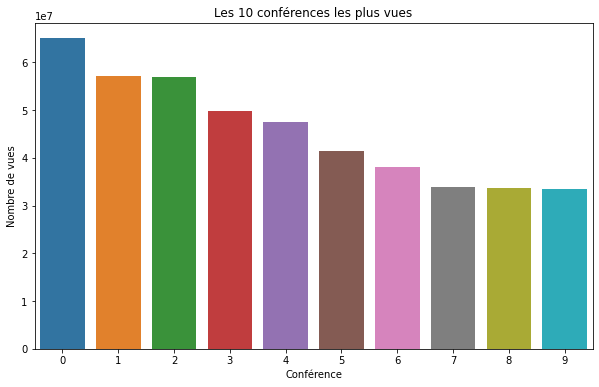

In [7]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/most_viewed.png")
plt.show()

# Durées

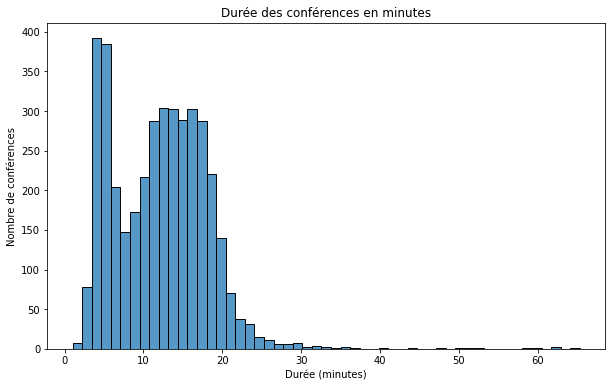

In [8]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
if save: plt.savefig("../data/graphs/duration.png")
plt.show()

# Corrélations

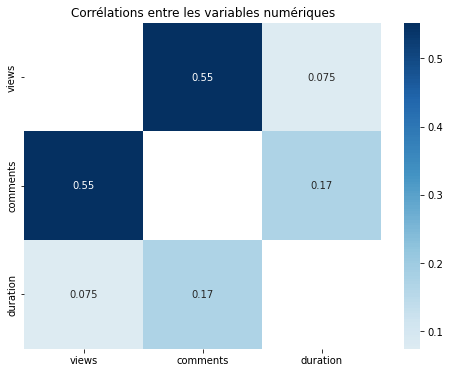

In [9]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
if save: plt.savefig("../data/graphs/correlations.png")
plt.show()

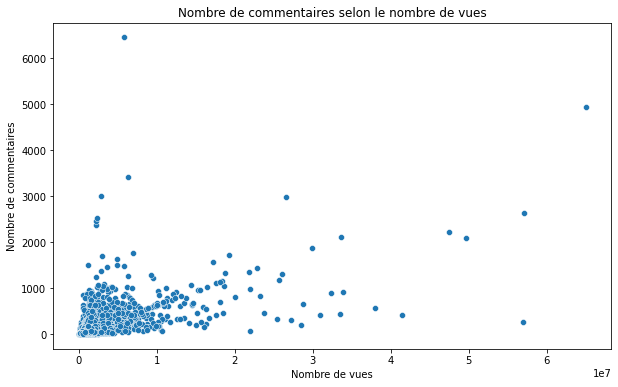

In [10]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
if save: plt.savefig("../data/graphs/comments_views.png")
plt.show()

# Thèmes à débat

In [11]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

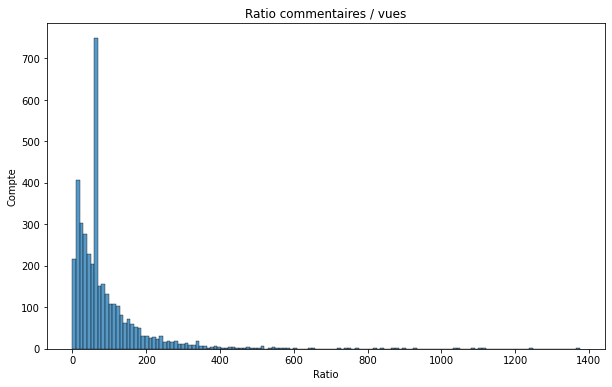

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks["comment_rate"])
plt.title("Ratio commentaires / vues")
plt.xlabel("Ratio")
plt.ylabel("Compte")
if save: plt.savefig("../data/graphs/comment_rate.png")
plt.show()

In [13]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

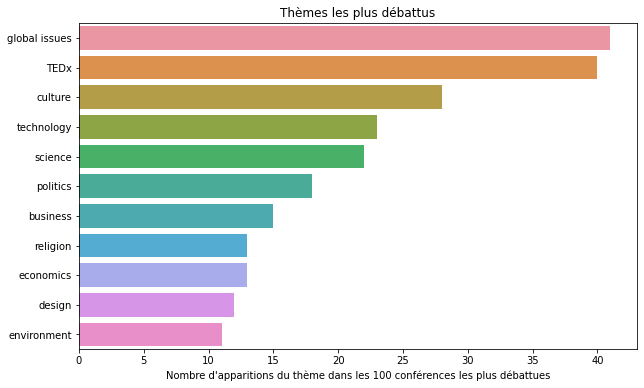

In [14]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
if save: plt.savefig("../data/graphs/debated_topics.png")
plt.show()

# Thèmes les plus vus

In [15]:
most_viewed_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_viewed_topics = most_viewed_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_viewed_topics = most_viewed_topics[most_viewed_topics > 10]

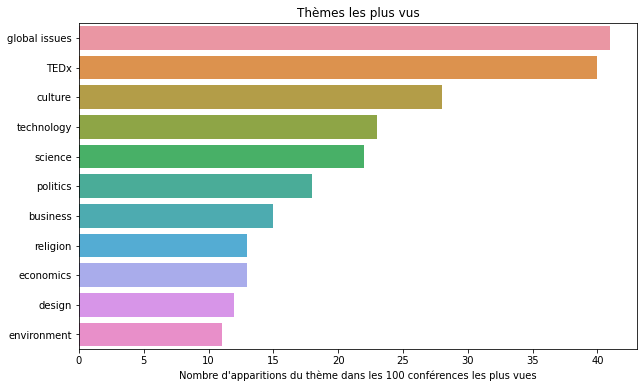

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
if save: plt.savefig("../data/graphs/viewed_topics.png")
plt.show()

# Orateurs

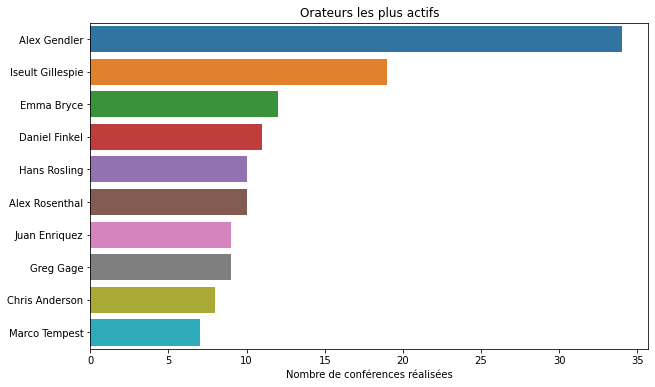

In [18]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
if save: plt.savefig("../data/graphs/speakers.png")
plt.show()

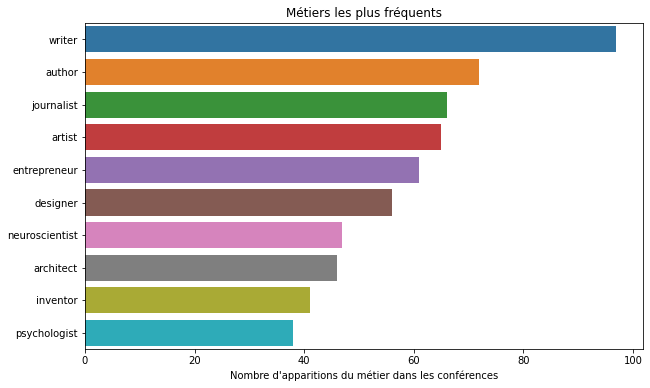

In [19]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)[0] if pd.notna(x) else x).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
if save: plt.savefig("../data/graphs/frequent_occupations.png")
plt.show()

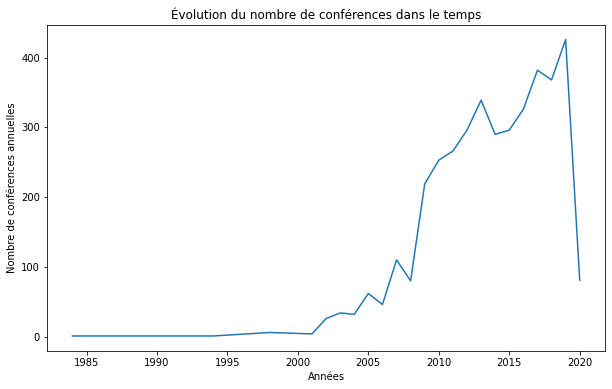

In [20]:
ted_talks.recorded_date = ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)
ted_talks.recorded_date = pd.to_datetime(ted_talks.recorded_date)

talks_by_year = ted_talks.recorded_date.dt.year.value_counts()
# talks_by_year = talks_by_year[talks_by_year.index < 2020]

plt.figure(figsize=(10, 6))

sns.lineplot(x=talks_by_year.index, y=talks_by_year)
plt.title("Évolution du nombre de conférences dans le temps")
plt.xlabel("Années")
plt.ylabel("Nombre de conférences annuelles")
if save: plt.savefig("../data/graphs/talks_evolution.png")
plt.show()

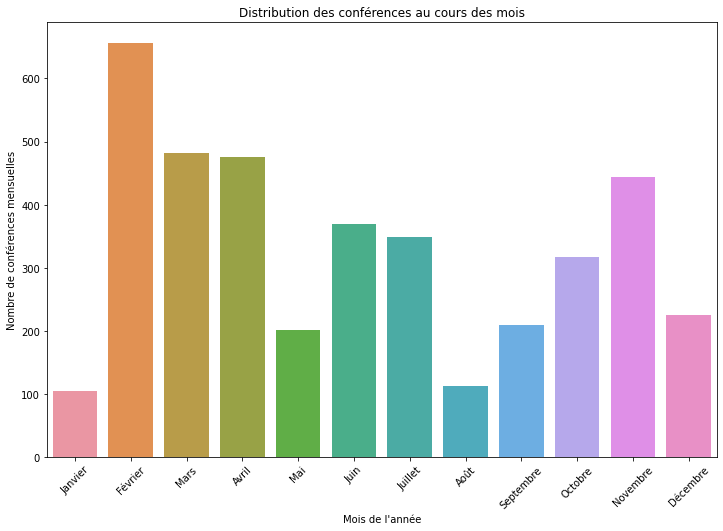

In [21]:
talks_by_month = ted_talks.recorded_date.dt.month.value_counts().sort_index()
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=talks_by_month)
plt.xticks(rotation=45)
plt.title("Distribution des conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de conférences mensuelles")
if save: plt.savefig("../data/graphs/months_talks.png")
plt.show()

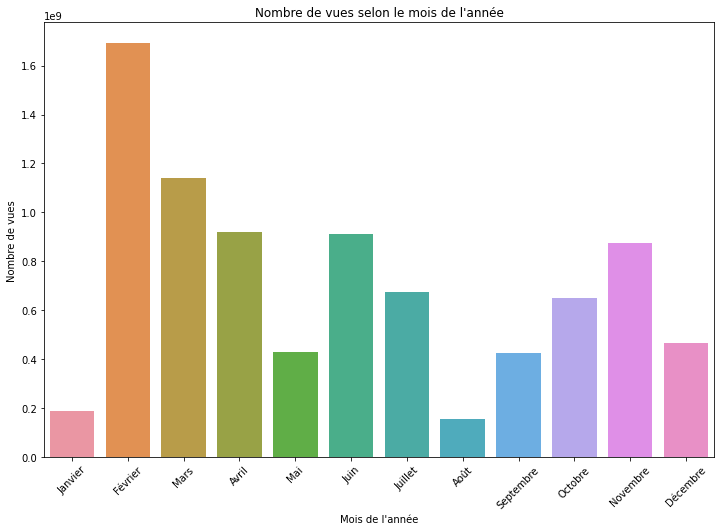

In [22]:
ted_talks["recorded_month"] = ted_talks.recorded_date.dt.month

views_by_months = ted_talks.groupby("recorded_month").sum()["views"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=views_by_months)
plt.xticks(rotation=45)
plt.title("Nombre de vues selon le mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/months_views.png")
plt.show()

In [23]:
talks_by_year_month = ted_talks.groupby(pd.Grouper(key="recorded_date", freq="M")).count()["talk_id"]
talks_by_year_month = talks_by_year_month[talks_by_year_month.index.year > 1996]
talks_by_year_month

recorded_date
1997-01-31     0
1997-02-28     0
1997-03-31     0
1997-04-30     0
1997-05-31     0
              ..
2019-12-31    45
2020-01-31    20
2020-02-29    22
2020-03-31    19
2020-04-30    20
Freq: M, Name: talk_id, Length: 280, dtype: int64

In [24]:
years = talks_by_year_month.index.year.unique()

df_year_month = []

for year in years:
    to_append = list(talks_by_year_month[talks_by_year_month.index.year == year])
    if year == 1984:
        to_append = [0] + to_append
    df_year_month.append(to_append)

df_year_month = pd.DataFrame(df_year_month, columns=months)
df_year_month.index = years
df_year_month.fillna(0, inplace=True)

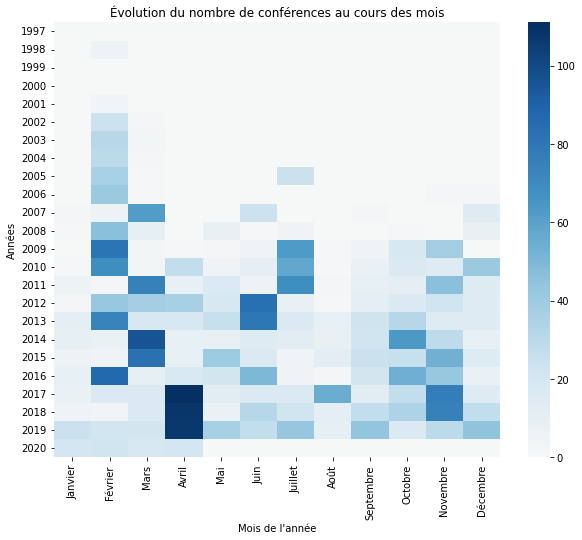

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(pd.DataFrame(df_year_month), cmap="RdBu", center=0)
plt.title("Évolution du nombre de conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Années")
if save: plt.savefig("../data/graphs/year_month_evolution.png")
plt.show()

# Boxplots

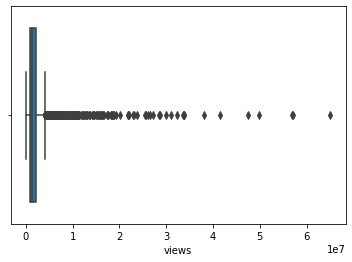

In [26]:
sns.boxplot(x=ted_talks.views)
plt.show()

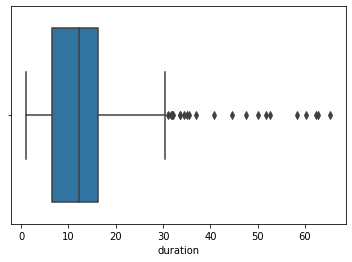

In [27]:
sns.boxplot(x=ted_talks.duration / 60)
plt.show()

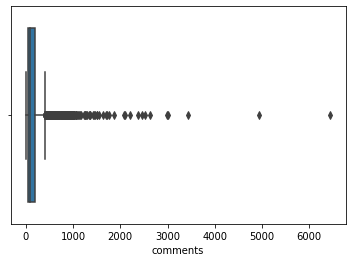

In [28]:
sns.boxplot(x=ted_talks.comments)
plt.show()

# Thèmes

In [29]:
# Source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [30]:
def evaluate(x):
    if pd.isna(x):
        return x
    return literal_eval(x)

ted_talks.topics = ted_talks.topics.apply(evaluate)

In [31]:
one_hot_topics = boolean_df(ted_talks.topics, ted_talks.topics.explode().unique())
one_hot_topics["year"] = ted_talks.recorded_date.dt.year
one_hot_topics

,alternative energy,cars,climate change,culture,environment,global issues,science,sustainability,technology,MacArthur grant,...,Audacious Project,TEDNYC,TED Residency,autism,cooperation,TED en Español,exoskeleton,rap,TED Connects,year
0,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,2006
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2006
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2006
4,False,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2019
3941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020
3942,False,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020
3943,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2020


In [32]:
most_talked_ted = ted_talks.topics.explode().value_counts().head(12).index
most_talked = most_talked_ted.drop(["TED-Ed", "TEDx"])
most_talked

Index(['science', 'technology', 'culture', 'global issues', 'society',
       'design', 'social change', 'animation', 'business', 'health'],
      dtype='object')

In [33]:
top_topics_by_year = one_hot_topics.groupby("year").sum()[most_talked]
top_topics_by_year = top_topics_by_year[(top_topics_by_year.index >= 2010) & (top_topics_by_year.index != 2020)]
top_topics_by_year.index = pd.to_datetime(top_topics_by_year.index, format="%Y")
top_topics_by_year

,science,technology,culture,global issues,society,design,social change,animation,business,health
year,,,,,,,,,,
2010-01-01,67,64,65,64,6,44,8,1,49,21
2011-01-01,76,88,76,55,4,54,9,0,25,15
2012-01-01,76,74,55,55,9,33,9,25,33,30
2013-01-01,67,72,56,41,2,33,13,69,34,29
2014-01-01,55,41,25,33,8,17,12,47,22,34
2015-01-01,72,62,20,37,37,36,28,46,15,57
2016-01-01,70,79,23,44,111,37,83,48,38,52
2017-01-01,89,69,29,31,144,34,117,33,36,55
2018-01-01,100,87,43,24,105,33,91,18,30,45


[]

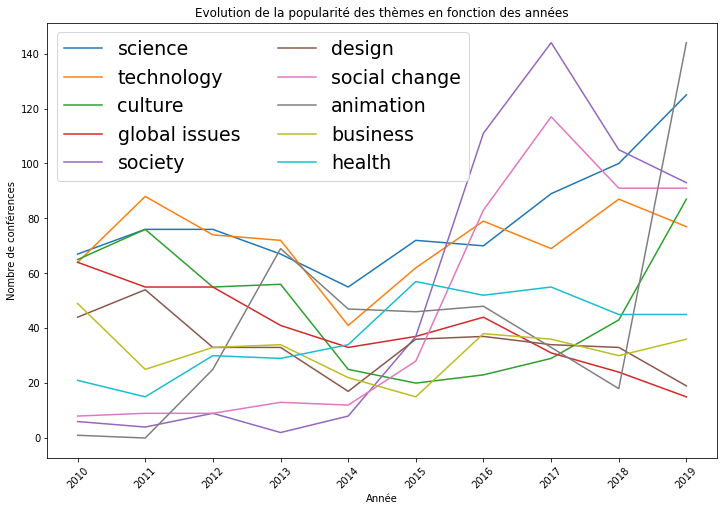

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(top_topics_by_year)
plt.title("Evolution de la popularité des thèmes en fonction des années")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.ylabel("Nombre de conférences")
plt.legend(top_topics_by_year.columns,fontsize = 19, ncol = 2) 
if save: plt.savefig("../data/graphs/topics_evolution.png")
plt.plot()

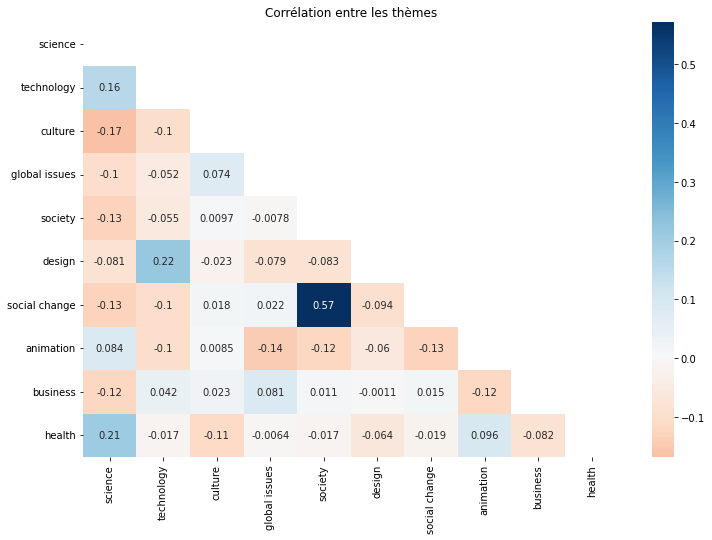

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(one_hot_topics[most_talked].corr(),
            mask=np.tril(np.ones((10,10))).T, cmap="RdBu", center=0, annot=True)
plt.title("Corrélation entre les thèmes")
if save: plt.savefig("../data/graphs/topics_correlation.png")
plt.show()

## Nombres de métiers représentés dans les thèmes les plus populaires

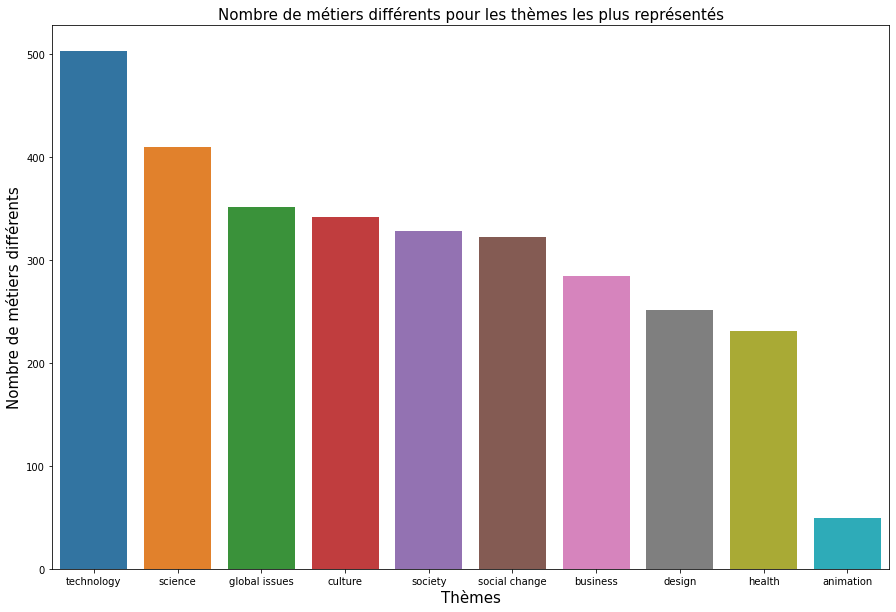

In [36]:
index_popular_topic = top_topics_by_year.columns
index_popular_topic

df_pop_occ = ted_talks[["occupations", "topics"]]

col1 = df_pop_occ.occupations.apply(lambda x : literal_eval(x)[0] if pd.notnull(x) else x ).dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col1.index]

df_pop_occ["occ0"] = col1.values

df_pop_occ.drop("occupations", axis = 1, inplace = True)

col2 = df_pop_occ.topics.dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col2.index]

df_pop_occ["top"] = col2.values

df_pop_occ.drop("topics", axis = 1, inplace = True)

df_pop_occ.drop_duplicates(inplace = True)

df_pop_occ_counted = df_pop_occ.groupby("top").count().loc[index_popular_topic]

df_pop_occ_counted.sort_values(by = "occ0", ascending = False, inplace = True)

df_pop_occ_counted

plt.figure(figsize=(15, 10))

sns.barplot(x = df_pop_occ_counted.index, y=df_pop_occ_counted.values.reshape(1,-1)[0])
plt.title("Nombre de métiers différents pour les thèmes les plus représentés", fontsize=15)
plt.xlabel("Thèmes", fontsize=15)
plt.ylabel("Nombre de métiers différents", fontsize=15)
plt.show()

## Nombre de pays associes aux évènements

In [38]:
EventCountry = pd.read_csv("../event_country_mapping.csv")
EventCountry.country.value_counts()

USA                     222
Canada                   71
England                  38
Netherlands              11
Germany                  11
Switzerland              10
Australia                 7
India                     6
Belgium                   6
Sweden                    5
Ireland                   4
Spain                     3
Scotland                  3
New Zealand               3
Israel                    3
Kenya                     3
France                    3
China                     3
Italy                     2
Japon                     2
South Africa              2
Norway                    2
Poland                    2
Greece                    2
United States             2
Mexico                    1
Africa                    1
Denmark                   1
Qatar                     1
Georgia                   1
Austria                   1
Galápagos                 1
Livonia                   1
Ghana                     1
Ethiopia                  1
Papua New Guinea    

In [39]:
ted_talks.country.value_counts()

Canada                  1864
USA                     1543
England                  124
Scotland                  68
India                     56
Australia                 37
Switzerland               32
Netherlands               23
Germany                   20
Galápagos                 18
China                     18
France                    17
Belgium                   14
Italy                     12
Papua New Guinea           8
Ireland                    7
Norway                     7
Greece                     7
Sweden                     5
Ethiopia                   5
Austrich                   4
Qatar                      4
Spain                      4
Israel                     4
Kenya                      4
Argentina                  4
Japon                      3
Slovakia                   3
Poland                     3
Singapore                  3
Hungary                    3
New Zealand                3
South Africa               2
Africa                     2
Ghana         